In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import cv2 #OpenCV Module

In [3]:
#Reading the Img

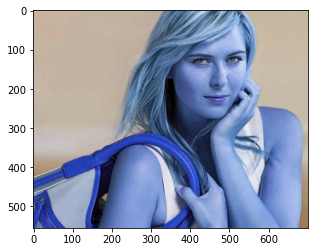

In [4]:
img=cv2.imread("./test_images/sharapova1.jpg")
plt.imshow(img)

In [5]:
img.shape #return 3 values which is x and y and the RGB value

(555, 700, 3)

In [6]:
#Converting the img into grey img just for the more clear understanding of img

In [7]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

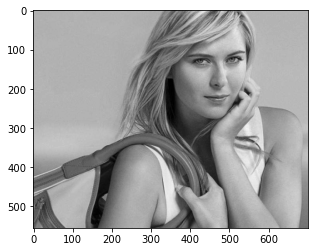

In [8]:
plt.imshow(gray,cmap='gray')

Now, We gotta detect the face and eyes of sportsperson, so model can uderstand face better Using HAAR Cascade that use line and edge features

In [9]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

### HAAR Cascading..

In [10]:
#detecting Face and Eyes of img usign HAAR cascading...

In [11]:
face_cascade=cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eyes_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')


faces=face_cascade.detectMultiScale(gray,1.3,5)
eyes=eyes_cascade.detectMultiScale(gray,1.3,5)


In [12]:
faces
eyes

array([[486, 102,  49,  49],
       [400, 102,  56,  56]], dtype=int32)

We get the list which return 4 values which are x and y points which is starting points from where the face start and 233,233 is the height and width of face

x=352
y=38
height=233
widht=233

LETS DRAW THE IMAGE WITH RECTANGLE DETECTING ONLY FACE ON THE IMAGE

In [13]:
(x,y,w,h)=faces[0]
x,y,w,h

(352, 38, 233, 233)

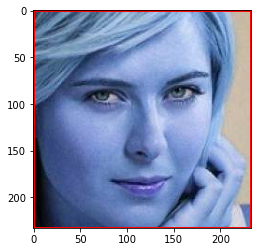

In [14]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
roi_color=face_img[y:y+h, x:x+w]
plt.imshow(roi_color)


In [15]:
(x2,y2,w2,h2)=eyes[0]
(x1,y1,w1,h1)=eyes[1]


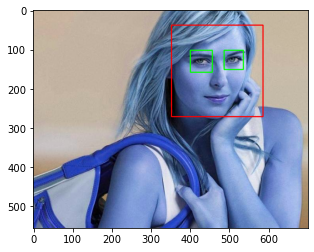

In [16]:
eyes_img=cv2.rectangle(img,(x2,y2),(x2+w2,y2+h2),(0,255,0),2)
eyes_img=cv2.rectangle(img,(x1,y1),(x1+w1,y1+h1),(0,255,0),2)


plt.imshow(eyes_img)



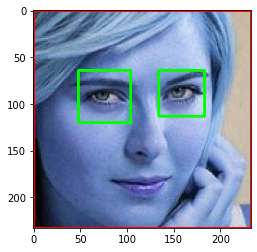

In [17]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
roi_color=face_img[y:y+h, x:x+w]
plt.imshow(roi_color)


In [18]:
def get_cropped_img_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
        else:
            return None

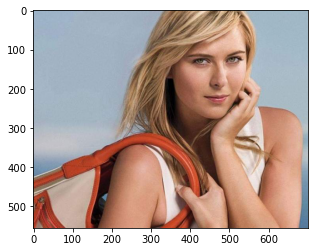

In [19]:
oi=plt.imread('./test_images/sharapova1.jpg')
plt.imshow(oi)

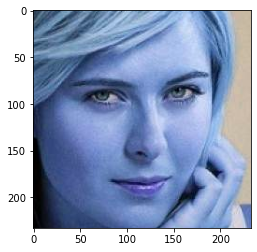

In [20]:
croped_img=get_cropped_img_if_2_eyes("./test_images/sharapova1.jpg")
plt.imshow(croped_img,cmap='gray')

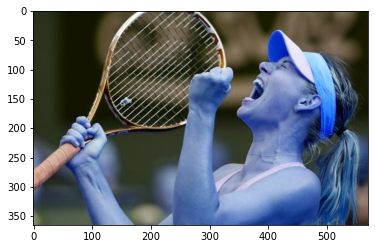

In [21]:
ob_img=cv2.imread('./test_images/sharapova2.JPG')
plt.imshow(ob_img)

In [59]:
croped_img=get_cropped_img_if_2_eyes("C:\PyCode\SportPersonClassifier\model\image_dataset\lionel_messi\images.jfif")
#plt.imshow(croped_img,cmap='gray')
croped_img

#ignoring the images which do not have visibity of eyes clear by returnin NONE

Everythin is looking good, we have detected only the face and cropped it.
Now we gotte save only these croped image to feed to model , so we are creating directory called cropped_img and saving all those images into that folder

# Image Preprocessing

##### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [23]:


import numpy as np
import pywt

import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H



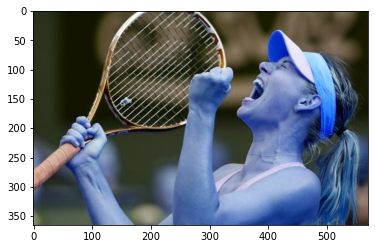

In [31]:
ob_img=cv2.imread('./test_images/sharapova2.JPG')
plt.imshow(ob_img)

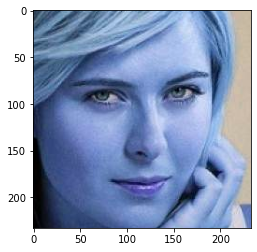

In [34]:
croped_img=get_cropped_img_if_2_eyes("./test_images/sharapova1.jpg")
plt.imshow(croped_img,cmap='gray')

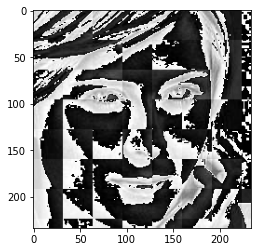

In [38]:
im_har = w2d(croped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

#following Image called wavelet transformed image, which helps us to find more definite feature such as eyes,lips,nose etc

###### Wavelet Transform

In [24]:
#scanning all those folder containing imgaes of sportsperson

In [25]:
path_to_data='./image_dataset/'
path_to_cr_data='./image_dataset/cropped/'

In [26]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        

In [27]:
img_dirs

['./image_dataset/cropped',
 './image_dataset/lionel_messi',
 './image_dataset/maria_sharapova',
 './image_dataset/roger_federer',
 './image_dataset/serena_williams',
 './image_dataset/virat_kohli']

In [80]:
#creating cropped folder in the image_dataset folder to put cropped images in there..

In [54]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [55]:
cropped_img_dirs=[]
celeb_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celeb_name=img_dir.split("/")[-1]
    print(celeb_name)
    celeb_file_names_dict[celeb_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_img_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celeb_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print("Generating cropped images in folder:",cropped_folder)
                
            cropped_file_name=celeb_name+str(count)+".png"
            cropped_file_path=cropped_folder+'/'+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            
            celeb_file_names_dict[celeb_name].append(cropped_file_path)
            count+=1

cropped
lionel_messi
Generating cropped images in folder: ./image_dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder: ./image_dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder: ./image_dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder: ./image_dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder: ./image_dataset/cropped/virat_kohli


#### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [46]:
class_dict = {}
count = 0
for celeb_name in celeb_file_names_dict.keys():
    class_dict[celeb_name] = count
    count = count + 1
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

Now the thing is, during training the model we have feed the model both images cropped image and wavelet transform image because each of those image contains features more acuratly together

### Let's prepare X and y now

In [47]:
celeb_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celeb_file_names_dict[celebrity_name] = file_list
celeb_file_names_dict

{'cropped': ['./image_dataset/cropped\\lionel_messi',
  './image_dataset/cropped\\maria_sharapova',
  './image_dataset/cropped\\roger_federer',
  './image_dataset/cropped\\serena_williams',
  './image_dataset/cropped\\virat_kohli'],
 'lionel_messi': ['./image_dataset/lionel_messi\\02453493f852c0efe8ff951dea5845c4.jpg',
  './image_dataset/lionel_messi\\10_MESSI_JUGADORS-WEB.jpg',
  './image_dataset/lionel_messi\\1211643746.jpg.0.jpg',
  './image_dataset/lionel_messi\\136054219.jpg.0.jpg',
  './image_dataset/lionel_messi\\190703-lionel-messi.jpg',
  './image_dataset/lionel_messi\\20190804-The18-Image-Lionel-Messi-Speech-Camp-Nou-2019-1280x720.jpg',
  './image_dataset/lionel_messi\\26622.jpg',
  './image_dataset/lionel_messi\\27243622-0-image-m-13_1586991155251.jpg',
  './image_dataset/lionel_messi\\28003-1510231943.jpg',
  './image_dataset/lionel_messi\\28410198-8321609-image-a-96_1589497931974.jpg',
  './image_dataset/lionel_messi\\5bd946a6cdbadfc416e59db42422c06c.jpg',
  './image_datas

In [48]:
len(celeb_file_names_dict.get("cropped")[1])

39

In [58]:
celeb_file_names_dict.values()



dict_values([[], ['./image_dataset/cropped/lionel_messi/lionel_messi1.png', './image_dataset/cropped/lionel_messi/lionel_messi2.png', './image_dataset/cropped/lionel_messi/lionel_messi3.png', './image_dataset/cropped/lionel_messi/lionel_messi4.png', './image_dataset/cropped/lionel_messi/lionel_messi5.png', './image_dataset/cropped/lionel_messi/lionel_messi6.png', './image_dataset/cropped/lionel_messi/lionel_messi7.png', './image_dataset/cropped/lionel_messi/lionel_messi8.png', './image_dataset/cropped/lionel_messi/lionel_messi9.png', './image_dataset/cropped/lionel_messi/lionel_messi10.png', './image_dataset/cropped/lionel_messi/lionel_messi11.png', './image_dataset/cropped/lionel_messi/lionel_messi12.png', './image_dataset/cropped/lionel_messi/lionel_messi13.png', './image_dataset/cropped/lionel_messi/lionel_messi14.png', './image_dataset/cropped/lionel_messi/lionel_messi15.png', './image_dataset/cropped/lionel_messi/lionel_messi16.png', './image_dataset/cropped/lionel_messi/lionel_me

In [60]:
X, y = [], []
for celebrity_name, training_files in celeb_file_names_dict.items():
    for training_image in training_files:
        
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
            

In [92]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [94]:
len(X[0])

4096

In [97]:


X = np.array(X).reshape(len(X),4096).astype(float)
X.shape


(152, 4096)

In [98]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [99]:
len(X)

152

### Data cleaning process is done. Now we are ready to train our model

In [100]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [120]:
X_train[0]

array([15., 15., 14., ..., 79., 15., 18.])

In [121]:

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7631578947368421

In [122]:
#classification report

print(classification_report(y_test, pipe.predict(X_test)))



              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           2       0.82      0.90      0.86        10
           3       0.43      0.75      0.55         4
           4       0.80      0.44      0.57         9
           5       0.80      1.00      0.89         8

    accuracy                           0.76        38
   macro avg       0.77      0.76      0.74        38
weighted avg       0.80      0.76      0.76        38



In [123]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [124]:
    model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [141]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.842292,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.657708,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.877470,{'logisticregression__C': 1}


In [142]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [143]:
best_clf = best_estimators['svm']
best_clf.predict(X_test)

array([3, 2, 2, 1, 2, 2, 2, 1, 4, 2, 2, 5, 5, 1, 3, 5, 4, 2, 4, 2, 5, 3,
       5, 5, 5, 2, 1, 5, 2, 4, 4, 3, 3, 4, 3, 3, 1, 2])

### Confustion Metrics

In [144]:
from sklearn.metrics import confusion_matrix


In [145]:
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[5, 0, 1, 1, 0],
       [0, 9, 1, 0, 0],
       [0, 1, 2, 1, 0],
       [0, 2, 3, 4, 0],
       [0, 0, 0, 0, 8]], dtype=int64)

Text(69.0, 0.5, 'Truth')

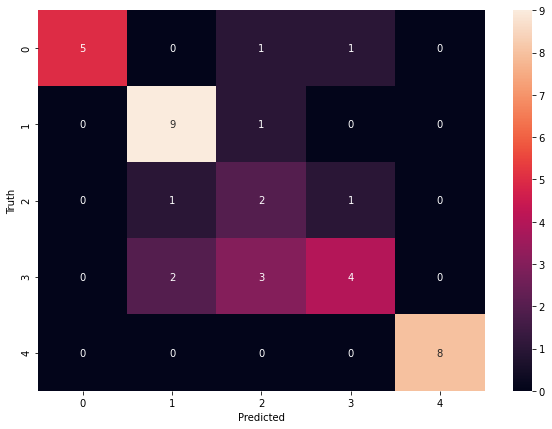

In [146]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')



### Saving Trained Model

In [148]:
!pip install joblib
import joblib 

joblib.dump(best_clf, 'saved_model.pkl')



['saved_model.pkl']

### Save Class Dictionary 

In [149]:
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [150]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))